## PyTorch Workflow

Relevant links:
- https://pytorch.org/docs/stable/nn.html

In [3]:
what_were_covering = {1: "Data",
                      2: "Model building",
                      3: "Fitting the model to data (training)",
                      4: "Make predictions",
                      5: "Experiment",
                      6: "Save model"}

In [9]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Preparing and loading data

Linear regression formula to make a straight line with known *oarameters*


In [30]:
# Known parameters
weight = 0.7
bias = 0.3

# Create model to get at the weight and bias values
# Create data

start = 0
end = 1
step = 0.02
# Upper case variable = tensor, lower case = vector
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias


### Now we create training and test sets
1. Training set
2. Validation set
3. Test set

In [53]:
# Create train/test split (80/20)
train_split = int(len(X) * 0.8)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Visualization of the data
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Test
    """

    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label="Predictions")
    
    plt.legend(prop={"size": 14})


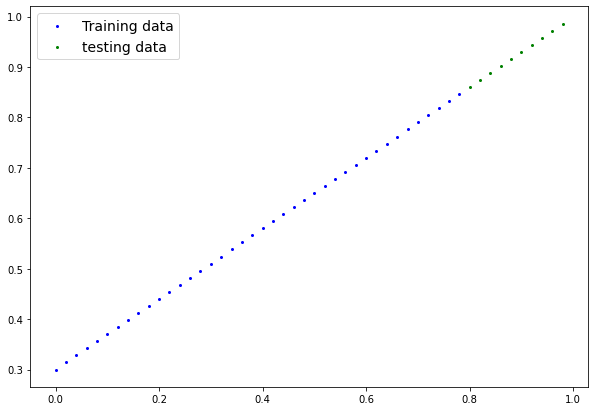

In [55]:
plot_predictions();

### Build model
- Python classes: https://realpython.com/python3-object-oriented-programming/
- PyTorch Cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html


In [78]:
# Create linear regression model
class LinearRegressionModule(nn.Module):

    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [83]:
# Seed
torch.manual_seed(42)

# Create an instance if the model
model_0 = LinearRegressionModule()

#print(list(model_0.parameters()))
print(model_0.state_dict())
print(f"Starting values: weight 0 {weight}, bias = {bias}")



OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Starting values: weight 0 0.7, bias = 0.3


In [92]:
# Using torch.inference_mode to predict weight and bias
with torch.inference_mode():
    y_preds = model_0(X_test)


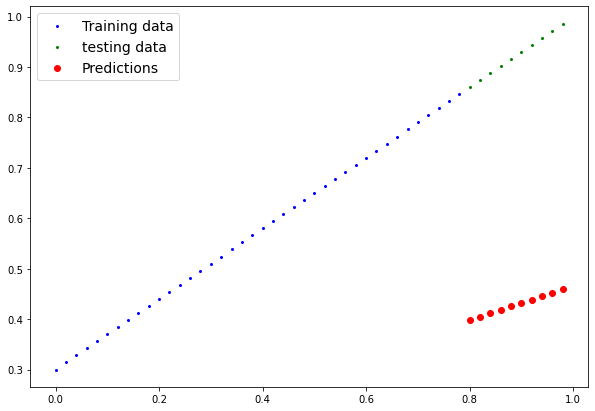

In [95]:
plot_predictions(predictions=y_preds)